In [140]:
import altair as alt
import pandas as pd

In [221]:
data = pd.read_excel("test_data.xlsx")

In [222]:
data["Hodina"] = pd.Series([pd.datetime(year=2017, month=7, day=30, hour=i) for i in range(0,24)])

In [226]:
data = data.drop(["Zatížení bez čerpání PVE", "čerpání PVE", "Zatížení brutto s čerpáním PVE", "Spotřeba brutto bez čerpání PVE"], 1)

In [266]:
melted = data.melt("Hodina", var_name="Type", value_name="Amount")

In [462]:
melted["Index"] = melted.index

In [452]:
selection = alt.selection_multi(fields=["Type"])

In [495]:
scale = alt.Scale(domain=['JE', 'PE', 'PPE + PSE', 'PVE', 'Saldo', "VE", "VTE", "FVE"],
                  range=['#c9042e', '#f96909', '#08a00a', '#c605c3', '#636163', "#1e05ad", "#00bded", "#fcd40a"])

In [496]:
color = alt.condition(selection,
                      alt.Color('Type:N', legend=None, scale=scale),
                      alt.value('lightgray'))

In [497]:
chart = alt.Chart(melted).mark_bar().encode(
    y=alt.Y("sum(Amount):Q", title="Zatížení"),
    x=alt.X("hoursminutes(Hodina):O", title="Hodina"),
    color=color,
    tooltip=["Amount", "Type"],
    order=alt.Order("Index", sort="ascending")
)

In [498]:
legend = alt.Chart(melted).mark_bar().encode(
    y=alt.Y('Type:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

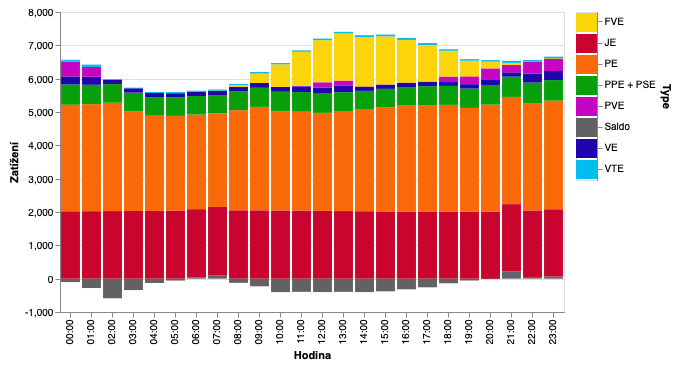

In [499]:
chart | legend